<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 27.7 MB 46 kB/s  eta 0:00:01
     |████████████████████████████████| 70 kB 562 kB/s eta 0:00:01


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [5]:
df=pd.DataFrame(dict_)
type(df)
df

,a,b
0,11,12
1,21,22
2,31,32


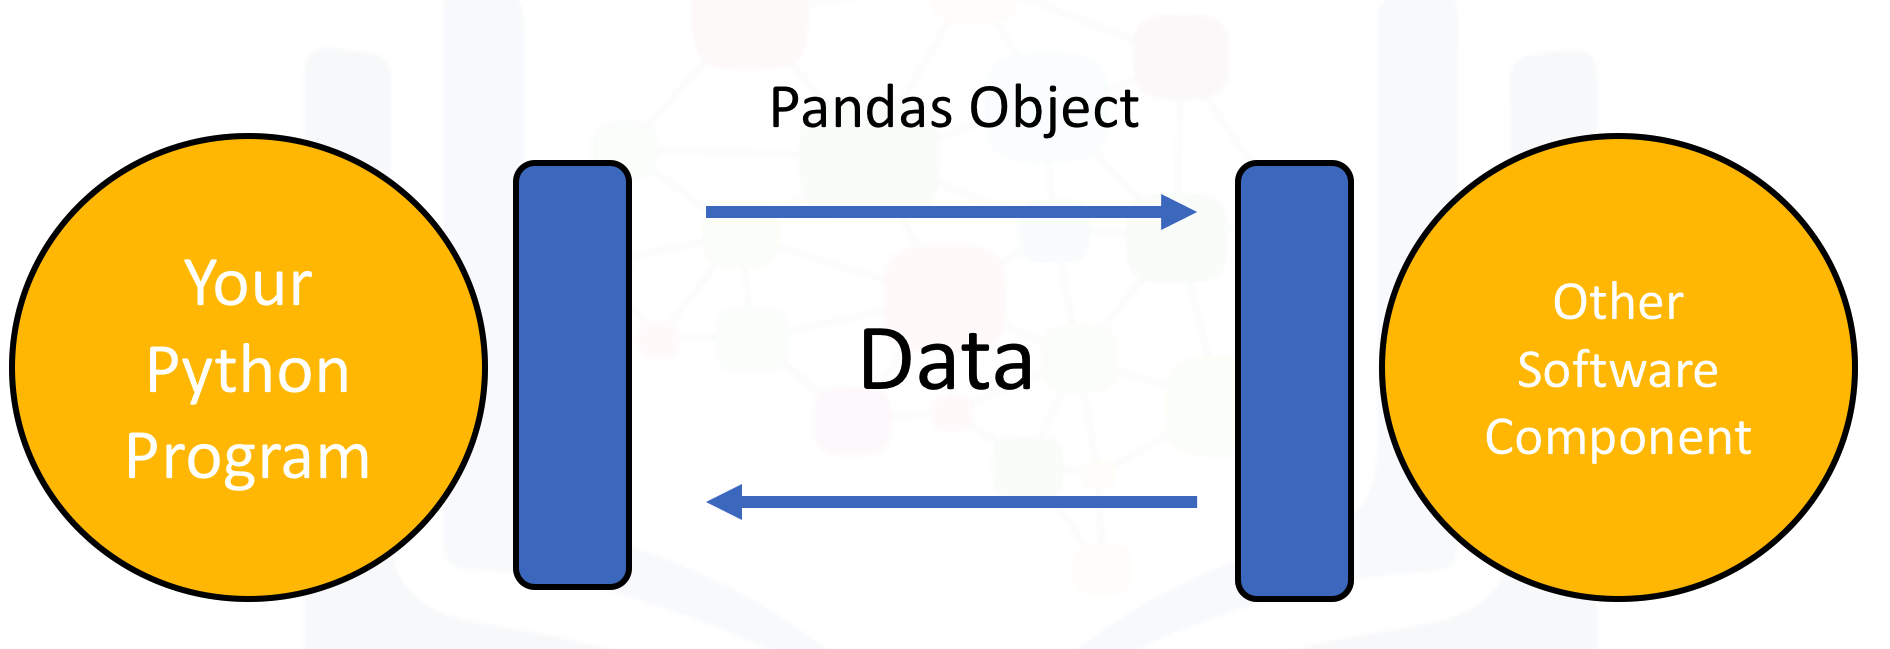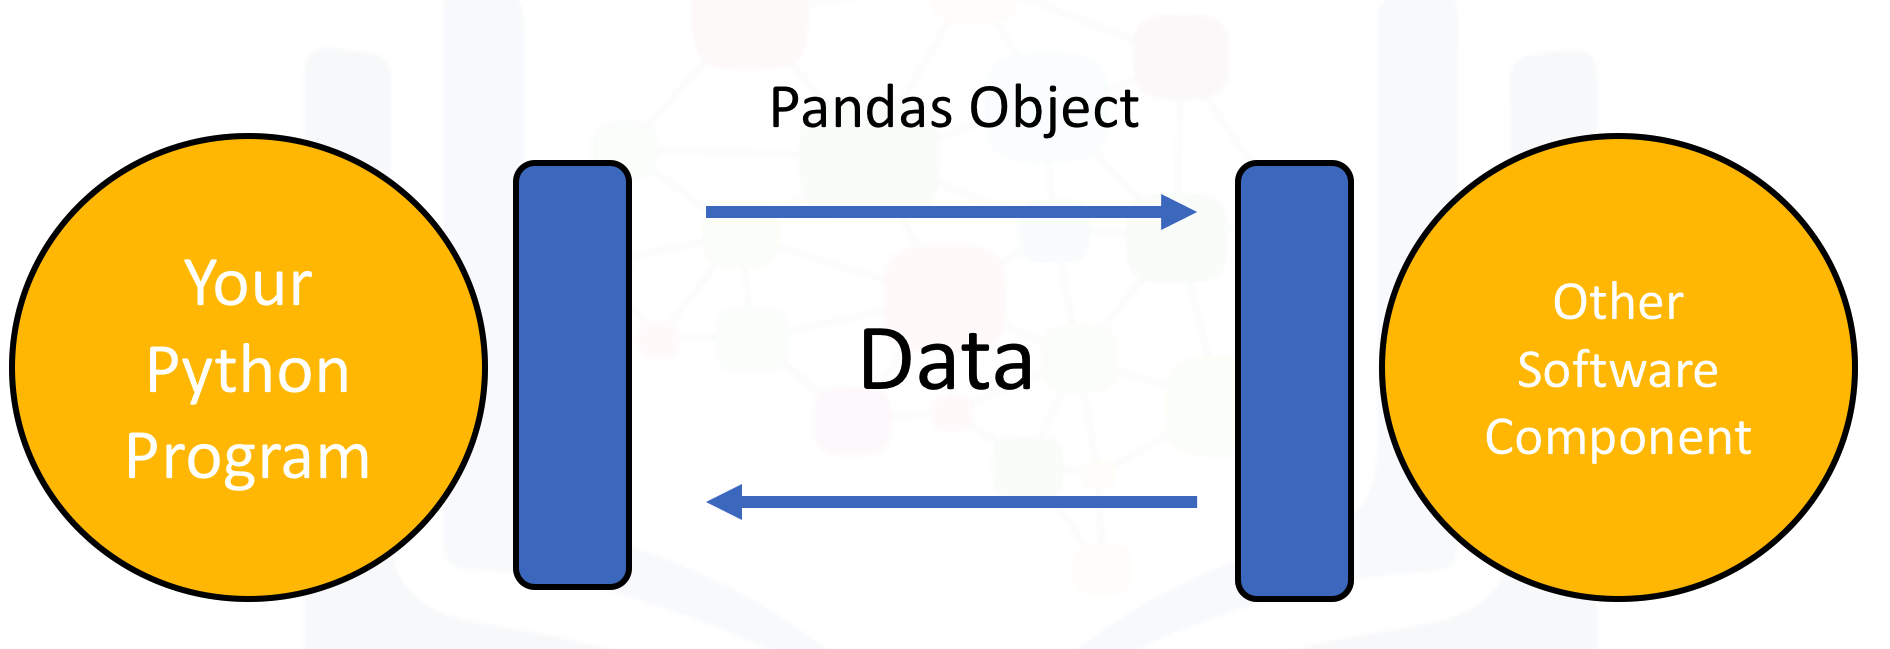<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [37]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [38]:
type(bitcoin_data )
df = pd.DataFrame(bitcoin_data)
df

,prices,market_caps,total_volumes
0,"[1645473707538, 38247.02012890013]","[1645473707538, 725342535945.1698]","[1645473707538, 23259500456.911945]"
1,"[1645477290826, 38309.05444726724]","[1645477290826, 726519724876.089]","[1645477290826, 23935573256.959892]"
2,"[1645480810171, 37581.38981158203]","[1645480810171, 712721399359.4717]","[1645480810171, 23594260625.838448]"
3,"[1645484475484, 37682.44208849052]","[1645484475484, 714639035658.7528]","[1645484475484, 25126065932.057007]"
4,"[1645488082950, 37059.979402287514]","[1645488082950, 703004241590.1829]","[1645488082950, 25174914104.16337]"
...,...,...,...
719,"[1648051386829, 42649.92622463832]","[1648051386829, 810581716572.7064]","[1648051386829, 21410112661.195263]"
720,"[1648054905172, 42554.068081438934]","[1648054905172, 807780574539.595]","[1648054905172, 21599467949.468624]"
721,"[1648058638449, 42104.73693159017]","[1648058638449, 803114313672.4679]","[1648058638449, 21677210159.622486]"
722,"[1648062179542, 42140.870527561834]","[1648062179542, 800978301718.0215]","[1648062179542, 21907110840.76483]"


The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [39]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1645473707538, 38247.02012890013],
 [1645477290826, 38309.05444726724],
 [1645480810171, 37581.38981158203],
 [1645484475484, 37682.44208849052],
 [1645488082950, 37059.979402287514]]

Finally lets turn this data into a Pandas DataFrame.


In [40]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1645473707538,38247.020129
1,1645477290826,38309.054447
2,1645480810171,37581.389812
3,1645484475484,37682.442088
4,1645488082950,37059.979402
...,...,...
719,1648051386829,42649.926225
720,1648054905172,42554.068081
721,1648058638449,42104.736932
722,1648062179542,42140.870528


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [28]:
# Time to date conversion.
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [33]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2022-02-21  37627.668793  38908.761853  37627.668793  38659.664933
1   2022-02-22  36629.471043  38309.054447  37906.354772  37722.245838
2   2022-02-23  37715.604620  39069.828402  37803.360559  38242.433347
3   2022-02-24  34740.011875  37848.229207  37848.229207  35945.724928
4   2022-02-25  36535.983232  39439.377050  36535.983232  39048.255168
5   2022-02-26  38691.388997  39804.535199  38691.388997  39340.101949
6   2022-02-27  38509.141745  39851.018387  39137.384715  39072.053134
7   2022-02-28  37587.930466  41126.859693  38976.411935  41126.859693
8   2022-03-01  41245.721654  44694.170377  41245.721654  43630.211099
9   2022-03-02  43515.996051  44790.135110  43849.431109  43868.757562
10  2022-03-03  42451.467848  44151.615433  43669.757508  42451.467848
11  2022-03-04  40780.971052  42568.913728  42261.185101  40867.858633
12  2022-03-05  38907.833258  40718.108240  40718.108240  39523.764235
13  2022-03-06  38354.338448  39608.446703  39467.073288  39036.411388
14  2022-03-07  37747.223723  39060.352623  38948.413705  38830.480746
15  2022-03-08  37387.923708  39077.070807  38088.635146  39077.070807
16  2022-03-09  38504.386230  42438.709542  38799.826770  42322.521951
17  2022-03-10  39017.831410  42267.558814  42059.655679  39219.787827
18  2022-03-11  38453.959787  39823.053679  39223.485229  38875.799175
19  2022-03-12  38480.102302  39234.690009  38704.118379  39126.971973
20  2022-03-13  38537.124926  39196.413432  39114.749405  38961.900746
21  2022-03-14  37842.034403  39225.376005  39014.205900  38779.929700
22  2022-03-15  38389.029813  39669.423812  38680.634754  39278.632125
23  2022-03-16  39088.400184  40799.647509  39332.480711  40413.026880
24  2022-03-17  39973.132720  41275.911651  39973.132720  40840.590223
25  2022-03-18  40445.755423  41656.842306  40829.337568  41656.842306
26  2022-03-19  41632.696509  42005.280153  41723.205287  41905.176694
27  2022-03-20  41029.135518  42241.361850  42008.898642  41029.135518
28  2022-03-21  40733.519931  41406.924010  41224.473160  41030.281479
29  2022-03-22  40983.024148  42994.731472  40983.024148  42594.258942
30  2022-03-23  41920.672853  42814.065934  42566.805856  42302.591869

Finally we are now ready to use plotly to create our Candlestick Chart.


In [42]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
